# Gradient Descent com Tensorflow

Author: H3dema

In [30]:
import tensorflow as tf
import numpy as np

%matplotlib inline  
import matplotlib.pyplot as plt

## Gera dados aleatoriamente

In [31]:
# gera uma conjunto de dados (aprox. reta) aleatoriamente
n = 150  # number of points
x_values = np.sort(100 *np.random.rand(n))
y_values = 5 * x_values + 100 * (np.random.rand(n) - 0.5)

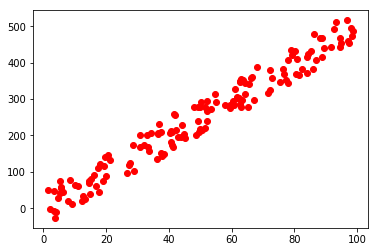

In [32]:
# scatter

plt.plot(x_values, y_values, 'ro', label="Pontos")
plt.show()

## Criação de variáveis para gradient descent no Tensorflow

In [33]:
# parametros da regressão
w = tf.Variable(0, name='weights', dtype='float')
b = tf.Variable(0, name='bias', dtype='float')

# placeholders
X = tf.placeholder("float")
Y = tf.placeholder("float")

# equação -- Y_Pred = w * X + b
Y_pred = tf.add(tf.multiply(w, X), b)

In [68]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))/(2 * n)

In [69]:
learning_rate = 0.01

# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [70]:
# Initializa as variáveis (i.e. coloca os valores default) --- obrigatório
init = tf.global_variables_initializer()

In [71]:
# para vermos o que acontece, vamos usar summary
#
# cost tensor
tf.summary.scalar("loss", cost)  # aqui em summary a variavel de custo

<tf.Tensor 'loss_4:0' shape=() dtype=string>

In [72]:
# accuracy tensor
#acc = tf.equal(tf.argmax(Y_pred, 1), tf.argmax(Y, 1))
#acc = tf.reduce_mean(tf.cast(acc, tf.float32))
# criar o summary
#tf.summary.scalar("accuracy", acc)

In [73]:
# Coloca todos os summaries em um único local
merged_summary_op = tf.summary.merge_all()

In [74]:
# Inicia a sessão de treino
sess = tf.Session()
sess.run(init)

In [75]:
# op to write logs to Tensorboard
logs_path = './logs'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

## Treinamento

In [84]:
training_epochs =  10
for epoch in range(training_epochs):
    for (x, y) in zip(x_values, y_values):
        _, c = sess.run([optimizer, cost], feed_dict={X: x, Y: y})
        # summary = sess.run(merged_summary_op, feed_dict={cost: c})
        # Write logs at every iteration
        # summary_writer.add_summary(summary, epoch)

In [ ]:
print("Optimização terminou -- %d passos" % training_epochs)
training_cost = sess.run(cost, feed_dict={X: x_values, Y: y_values})
print("Custo   = %7.3f" % training_cost)
print("Weights = %7.3f" % sess.run(w))
print("Bias    = %7.3f" % sess.run(b))

In [ ]:
# Gráfico do ajuste
plt.plot(x_values, y_values, 'ro', label='valores originais')  # dispersão
plt.plot(x_values, sess.run(w) * x_values + sess.run(b), label='reta de regressao')

plt.legend(loc=2)  # loc=2 é "upper left"
plt.plot()

In [ ]:
print("Run the command line:\n" \
          "--> tensorboard --logdir=%s " \
          "\nThen open http://0.0.0.0:6006/ into your web browser" % logs_path)